In [1]:
import torch,os,mne
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
img_dir = '/root/workspace/wht/multimodal_brain/datasets/things/THINGS/Images'
directories = [name for name in os.listdir(img_dir) if os.path.isdir(os.path.join(img_dir, name))]
directories.sort()
print(len(directories))
all_images= []
for directory in directories:
    _images = [img for img in os.listdir(os.path.join(img_dir, directory)) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
    all_images.extend(_images)
print(len(all_images))

1854
26107


In [ ]:

subject_id=1
data_root='/root/workspace/wht/multimodal_brain/datasets/things-eeg'
eeg_data_dir = os.path.join(data_root,f'sub-{subject_id:02}','eeg')
eeg_data_path = os.path.join(eeg_data_dir,f'sub-{subject_id:02}_task-rsvp_eeg.eeg')
eeg_vhdr_path = os.path.join(eeg_data_dir,f'sub-{subject_id:02}_task-rsvp_eeg.vhdr')
eeg_vmrk_path = os.path.join(eeg_data_dir,f'sub-{subject_id:02}_task-rsvp_eeg.vmrk')
eeg_json_path = os.path.join(eeg_data_dir,f'sub-{subject_id:02}_task-rsvp_eeg.json')
eeg_event_path = os.path.join(eeg_data_dir,f'sub-{subject_id:02}_task-rsvp_events.tsv')

In [4]:
df = pd.read_csv(eeg_event_path, delimiter='\t')
df['object'].nunique()

1854

In [27]:
raw = mne.io.read_raw_brainvision(eeg_vhdr_path, preload=True)
channel_names = raw.ch_names
events, event_dict = mne.events_from_annotations(raw)
# events = mne.find_events(raw)

Extracting parameters from /root/workspace/wht/multimodal_brain/datasets/things-eeg/sub-01/eeg/sub-01_task-rsvp_eeg.vhdr...
Setting channel info structure...
Reading 0 ... 3035739  =      0.000 ...  3035.739 secs...
Used Annotations descriptions: ['Event/E  1', 'Event/E  2', 'Event/E  3', 'New Segment/']


In [6]:
epochs = mne.Epochs(raw, events, event_dict, tmin=-0.1, tmax=1, preload=True)

Not setting metadata
44569 matching events found
Setting baseline interval to [-0.1, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 44569 events and 1101 original time points ...
1 bad epochs dropped


In [17]:
_ = epochs.get_data()[0]

/tmp/ipykernel_12132/3106671783.py:1: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  _ = epochs.get_data()[0]


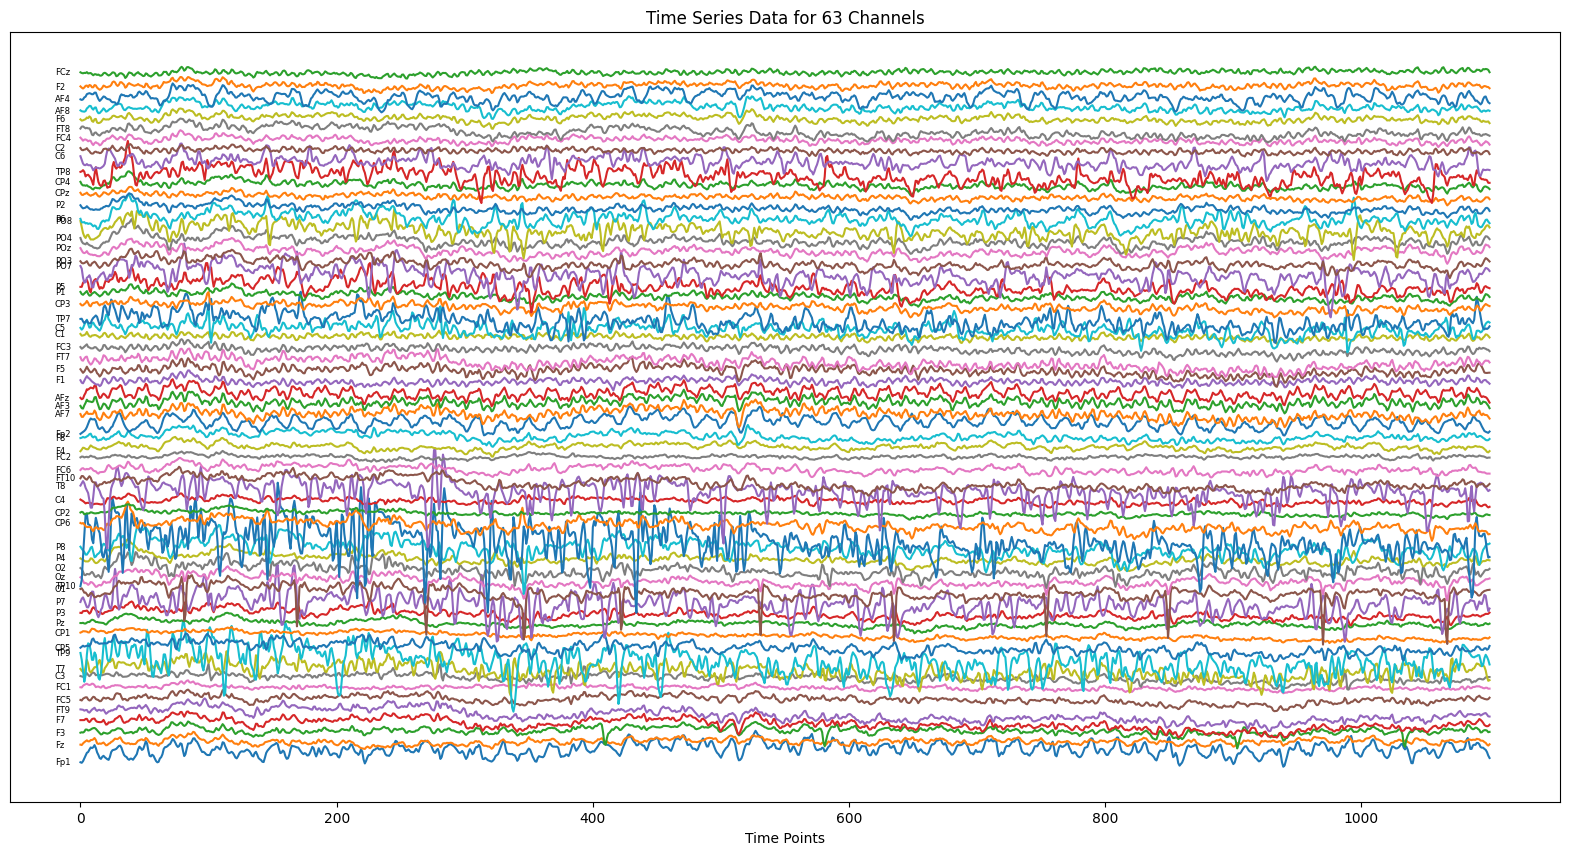

In [44]:
plt.figure(figsize=(20, 10))
offset = 0.00002

for i in range(_.shape[0]):
    plt.plot(_[i]+ i * offset, label=channel_names[i])
    plt.text(-20, _[i, 0] + i * offset, channel_names[i], verticalalignment='center',fontsize=6)
# plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), ncol=1)

plt.gca().yaxis.set_ticklabels([])
plt.gca().yaxis.set_ticks([])

plt.title('Time Series Data for 63 Channels')
plt.xlabel('Time Points')
# plt.ylabel('Amplitude')

plt.show()

In [4]:
print(raw.info)

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fz, F3, F7, FT9, FC5, FC1, C3, T7, TP9, CP5, CP1, Pz, P3, ...
 chs: 63 EEG
 custom_ref_applied: False
 dig: 66 items (3 Cardinal, 63 EEG)
 highpass: 0.0 Hz
 lowpass: 280.0 Hz
 meas_date: 2019-02-22 14:39:19 UTC
 nchan: 63
 projs: []
 sfreq: 1000.0 Hz
>


Using matplotlib as 2D backend.


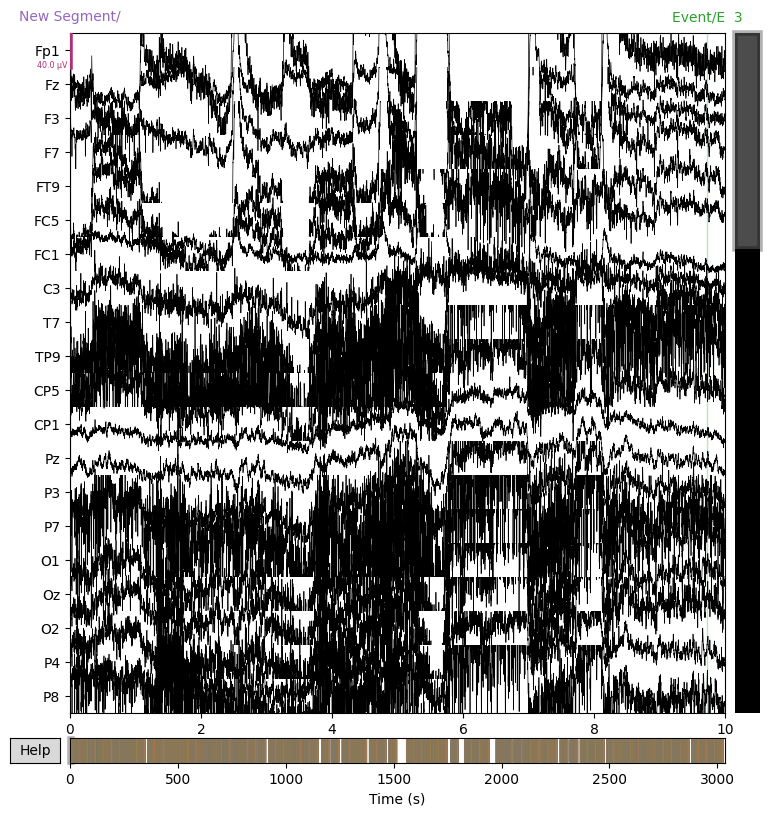

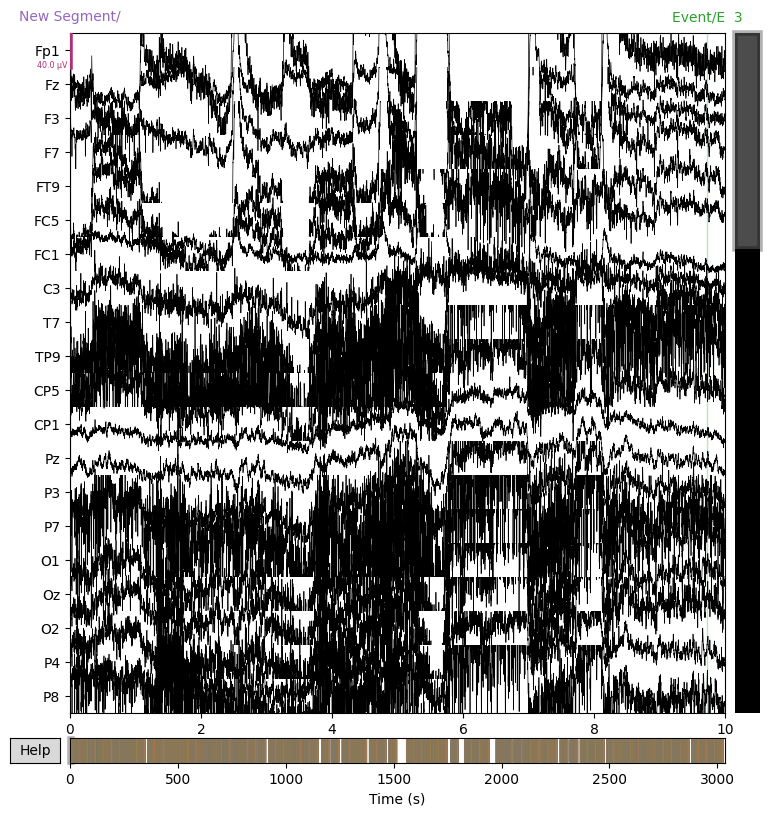

In [5]:
raw.plot()

In [5]:
print(raw.info['ch_names'])

['Fp1', 'Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'TP9', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'Fp2', 'AF7', 'AF3', 'AFz', 'F1', 'F5', 'FT7', 'FC3', 'C1', 'C5', 'TP7', 'CP3', 'P1', 'P5', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'P6', 'P2', 'CPz', 'CP4', 'TP8', 'C6', 'C2', 'FC4', 'FT8', 'F6', 'AF8', 'AF4', 'F2', 'FCz']


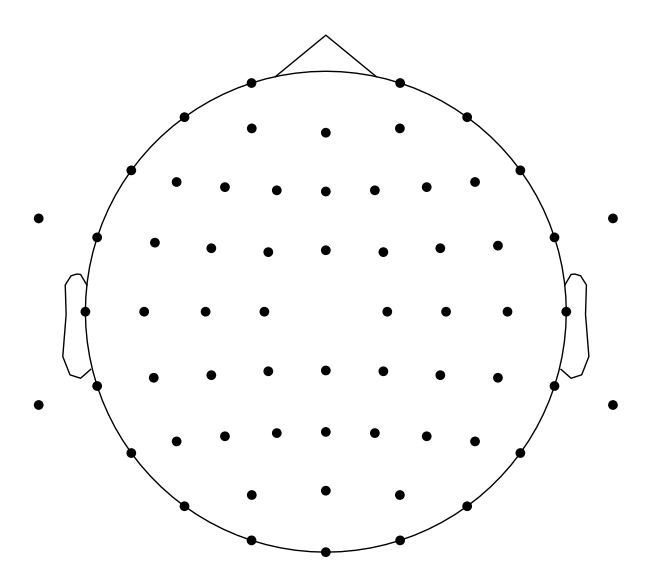

In [7]:
raw.plot_sensors()
plt.show()

Used Annotations descriptions: ['Event/E  1', 'Event/E  2', 'Event/E  3', 'New Segment/']


In [8]:
events.shape

(44569, 3)

In [14]:
event_dict

{'Event/E  1': 10001,
 'Event/E  2': 10002,
 'Event/E  3': 10003,
 'New Segment/': 99999}

In [19]:
event = events[4]
event_id = event[2]
event_time = event[0] / raw.info['sfreq']  # 将时间点转换为秒
event_description = event_dict.get(event_id, 'Unknown')
print(f"Event ID: {event_id} - Description: {event_description} - Time: {event_time} seconds")

Event ID: 10001 - Description: Unknown - Time: 10.823 seconds


In [6]:
path = '/root/workspace/wht/multimodal_brain/datasets/things/THINGS/Metadata/Image-specific/image_paths.csv'
df = pd.read_csv(path, sep='\t', header=None)
df

,0
0,images/aardvark/aardvark_01b.jpg
1,images/aardvark/aardvark_02s.jpg
2,images/aardvark/aardvark_03s.jpg
3,images/aardvark/aardvark_04s.jpg
4,images/aardvark/aardvark_05s.jpg
...,...
26102,images/zucchini/zucchini_09s.jpg
26103,images/zucchini/zucchini_10s.jpg
26104,images/zucchini/zucchini_11s.jpg
26105,images/zucchini/zucchini_12s.jpg


In [7]:
df[0].nunique()

26107

In [8]:
folder_path = '/root/workspace/wht/multimodal_brain/datasets/things/THINGS/Images'
category_counts = {}
for category in os.listdir(folder_path):
    category_path = os.path.join(folder_path, category)
    if os.path.isdir(category_path):
        count = 0
        for file in os.listdir(category_path):
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                count += 1
        category_counts[category] = count
total_images = sum(category_counts.values())

# for category, count in category_counts.items():
#     print(f"Category '{category}' has {count} images.")
print(f"There are {len(category_counts)} categories in total.")
print(f"There are {total_images} images in total across all categories.")


There are 1854 categories in total.
There are 26107 images in total across all categories.


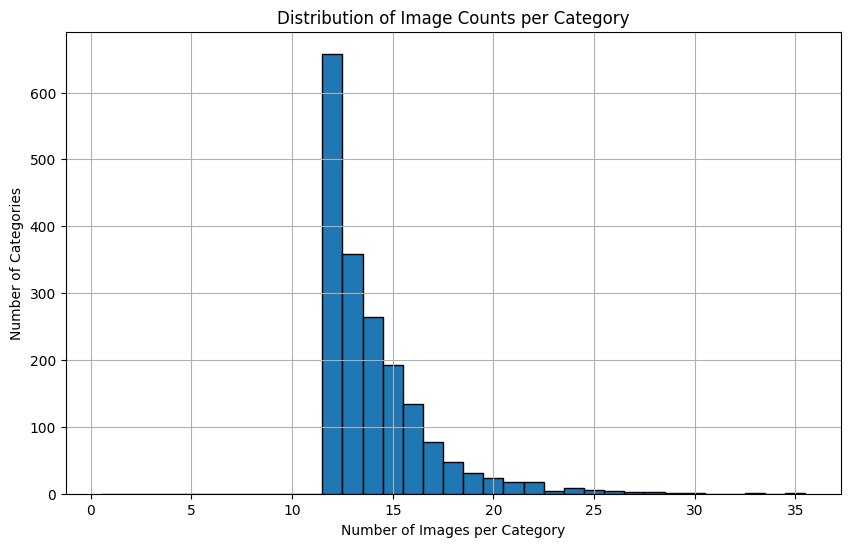

In [9]:
image_counts = list(category_counts.values())
plt.figure(figsize=(10, 6))
plt.hist(image_counts, bins=range(1, max(image_counts) + 2), edgecolor='black', align='left')
plt.title('Distribution of Image Counts per Category')
plt.xlabel('Number of Images per Category')
plt.ylabel('Number of Categories')
plt.grid(True)

In [13]:
min(image_counts)

12

In [15]:
import pandas as pd

# 读取 TSV 文件
df = pd.read_csv('/root/workspace/wht/multimodal_brain/src/predictions_labels.tsv', sep='\t')  # TSV 是 tab 分隔的，所以 sep 参数设为 '\t'

# 计算准确度
accurate_predictions = (df['all_predicted_classes'] == df['all_true_labels']).sum()
total_samples = len(df)
accuracy = accurate_predictions / total_samples

print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8547
